<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Ayudant%C3%ADas/Ayudant%C3%ADa2/A2_02_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com



## Sección 1
En esta sección seguiremos explorando los vuelos desde los aeropuertos de NY durante el 2013. En esta ocasión cargaremos los datasets desde el package _nycflights13_.

Para mayor informacíón sobre los datasets disponibles en este package  refiérase al iguiente link 
**https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf**



In [104]:
#install.packages("nycflights13")

data("flights", package = "nycflights13") # vuelos
data("weather", package = "nycflights13") # clima

vuelos <- flights
clima <- weather

head(vuelos, 3)
head(clima, 3)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00


origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00


In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## P1. Resumen retrasos 
Genere un resumen de la variable dep_delay del dataset _flights_.

In [10]:
head(vuelos,2)
# dep_delay:= departure delay (retraso en la salida del avión)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


dep_delay
<dbl>
2
4
2
-1
-6
-4


In [24]:
# 1. Obtener a dep_delay
# Alt 1: head(vuelos['dep_delay'])
# Alt 2: vuelos$dep_delay
# 2. Resumir
summary(vuelos$dep_delay)
length(vuelos$dep_delay)
nrow(vuelos['dep_delay'])

# Análisis NA
(8255/336776)*100

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -43.00   -5.00   -2.00   12.64   11.00 1301.00    8255 

[1] 336776

[1] 2.451184

[1] 336776

In [21]:
class(vuelos$dep_delay)

[1] "numeric"

In [22]:
class(vuelos['dep_delay'])

[1] "tbl_df"     "tbl"        "data.frame"

In [23]:
class(vuelos[['dep_delay']])

[1] "numeric"

## P2. Retrasos por aeropuerto
¿Cuál es el tiempo promedio de retraso de  llegada por cada aeropuerto de origen?

In [26]:
unique(vuelos$origin)

[1] "EWR" "LGA" "JFK"

In [38]:
# Arrive delay:= retrado de llegada
mean_arr_delay_df <- vuelos %>%
  group_by(origin) %>%
  summarize(mean_arr_delay = mean(arr_delay, na.rm = TRUE))

mean_arr_delay_df

# Otra manera de hacernos cargo de NA es "INTERPOLAR"

`summarise()` ungrouping output (override with `.groups` argument)



origin,mean_arr_delay
<chr>,<dbl>
EWR,9.107055
JFK,5.551481
LGA,5.783488


## P3. Ubicación de  NA's 

Elimine los registros donde *dep_delay* es NA  y también elimine los registros donde *arr_delay* es NA.

In [42]:
# dep_delay:= departure delay -> retraso en la salida
# arr_delay:= arrival delay -> retraso en la llegada

# Hay algún NA?
anyNA(vuelos$dep_delay)
anyNA(vuelos$arr_delay)
# R: SI

[1] TRUE

[1] TRUE

In [44]:
!is.na(vuelos$dep_delay)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [6

In [56]:
vuelos_filter_na <- vuelos %>%
  filter(!is.na(dep_delay) & !is.na(arr_delay))

In [57]:
vuelos_filter_na %>%
  filter(is.na(arr_delay)) %>%
  head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>


In [59]:
nrow(vuelos)
nrow(vuelos_filter_na)

nrow(vuelos) - nrow(vuelos_filter_na)

[1] 336776

[1] 327346

[1] 9430

In [55]:
?is.na

## P4. Vuelos con retrasos 
**a)** Genere un nuevo dataset llamado **vuelos_ret** que contenga todos los registros que tuvieron un  **retraso de salida**. Tenga en cuenta que ya debió tratar los NA's de la pregunta anterior y por ende están considerados en esta etapa.

**b)** Considerando el dataset anterior, ¿cuál es el retraso promedio de salida por aeropuerto de origen?

In [62]:
vuelos %>%
  filter(!is.na(dep_delay) & !is.na(arr_delay)) %>% # NA ANTERIORES
  filter(dep_delay > 0) %>%
  head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,601,600,1,844,850,-6,B6,343,N644JB,EWR,PBI,147,1023,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,611,600,11,945,931,14,UA,303,N532UA,JFK,SFO,366,2586,6,0,2013-01-01 06:00:00


In [105]:
vuelos_ret <- vuelos %>%
  filter(!is.na(dep_delay) & !is.na(arr_delay) & dep_delay > 0) # Esto es lo mismo que el punto anterior, pero en una sola línea

head(vuelos_ret)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,601,600,1,844,850,-6,B6,343,N644JB,EWR,PBI,147,1023,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,611,600,11,945,931,14,UA,303,N532UA,JFK,SFO,366,2586,6,0,2013-01-01 06:00:00


In [66]:
# retraso promedio de salida por aeropuerto de origen

# Omitiendo los vuelos donde el retraso de llegada y la salida no tiene registro,
# el promedio por origen es el siguiente:

vuelos_ret %>%
  group_by(origin) %>%
  summarize(mean_dep_delay = mean(dep_delay, na.rm = TRUE)) # <- no es necesario na.rm = TRUE pues ya eliminamos NA
  # Sin embargo, es una buena práctica

`summarise()` ungrouping output (override with `.groups` argument)



origin,mean_dep_delay
<chr>,<dbl>
EWR,38.83913
JFK,37.88509
LGA,41.54964


In [70]:
head(vuelos_ret,2)
tail(vuelos_ret,2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,9,30,2235,2001,154,59,2249,130,B6,1083,N804JB,JFK,MCO,123,944,20,1,2013-09-30 20:00:00
2013,9,30,2307,2255,12,2359,2358,1,B6,718,N565JB,JFK,BOS,33,187,22,55,2013-09-30 22:00:00


## P5. Retrasos por dia 
Genere un campo fecha en formato Date (puede utilizar la función as.Date()) que contenga la fecha del vuelo en formato "yyyy-mm-dd".

**a)** Una vez generado este nuevo campo, genere un gráfico que permita visualizar el retraso **promedio** de salida (*dep_delay*), por cada día. Por ejemplo, un gráfico de líneas.

**b)** Considerando el gráfico anterior, añada una curva de tendencia y determine (visualmente) si exsten meses con un alza notoria en relación a los retrasos de los vuelos.


In [84]:
# GENERAR!
# verbo "mutate"

muestra <- vuelos[c(1,nrow(vuelos)),c("year","month","day")] # "2013-01-01"
muestra

year,month,day
<int>,<int>,<int>
2013,1,1
2013,9,30


In [97]:
# RESUELVE PARA UNO, RESUELVES PARA TODOS (....no siempre, pero casi)
paste(
muestra[2,]$year, # check!
# [1 2 3 4 5 6 7 8 9] [10 11 12]
# 1 char | 2 char
ifelse(nchar(muestra[2,]$month) == 1, paste0("0", muestra[2,]$month), muestra[2,]$month), # mes
ifelse(nchar(muestra[2,]$day) == 1, paste0("0", muestra[2,]$day), muestra[2,]$day), # día
sep = "-")

[1] "2013-09-30"

In [ ]:
vuelos_ret %>%
  mutate(fecha = paste( # PROCESA y GENERA una columna FILA POR FILA
                      year,
                      ifelse(nchar(month) == 1, paste0("0", month), month), # mes
                      ifelse(nchar(day) == 1, paste0("0", day),day), # día
                      sep = "-"
                      )
        ) %>%
  mutate(fecha = as.Date(fecha))

In [106]:
vuelos_ret <- vuelos_ret %>%
  mutate(fecha = as.Date(paste( # PROCESA y GENERA una columna FILA POR FILA
                      year,
                      ifelse(nchar(month) == 1, paste0("0", month), month), # mes
                      ifelse(nchar(day) == 1, paste0("0", day),day), # día
                      sep = "-"
                      )
        ))

In [90]:
# PEGAR!
# paste
# paste0
?paste

## P6. Cruce con clima 
Se tiene la hipótesis de que el clima puede ser un factor importante en los retrasos, para ello cargue el dataset llamado "weather" del package "nycflights13"

**a)** Genere un dataset llamado *vuelos_ret_ampliado* que incluya tanto la información de los vuelos como del clima. (el match debe hacerse por "year","month","day","origin","time_hour").

## P7. Retrasos 15 min

Cree una columna de **tipo int** llamada *arr_delay_alto*, que tome el valor 1 si el retraso de llegada es mayor o igual a 15 min y 0 en caso contrario. De ahora en adelante diremos que esta columna indica si existió un _retraso alto_ o no.

## P8. Clima según retraso alto (4P)
    
**a)** ¿Cuál es la visibilidad (visib) promedio por tipo de retraso (alto y no alto)?

**b)** ¿Cuál es el valor de la precipitacion (precip) media por tipo de retraso (alto y no alto)?

**c)** ¿Cuál es el valor promedio de wind_gust (vientos fuertes)  por tipo de retraso?

**d)** ¿Qué se observa a partir del resumen anterior?

 ## P9. Tasa de retrasos (2P)
**a)** ¿Cuál es el aeropuerto de destino con mayor tasa de retrasos altos (arr_delay_alto) ? 

**b)** ¿Cuál es el mes con mayor tasa de retrasos altos?

# Respuestas

In [ ]:
# P1
summary(vuelos$dep_delay)

In [ ]:
# P2
vuelos %>%
    group_by(origin) %>% 
    summarise(m_arr_del = mean(arr_delay,na.rm=T))

In [ ]:
# P3 
vuelos %>% 
    filter(!is.na(dep_delay) & !is.na(arr_delay) ) 

In [ ]:
# P4
# a) 
  vuelos_ret <- filter(vuelos,!is.na(arr_delay) & !is.na(dep_delay)  & dep_delay > 0 )

In [ ]:
# P4
# b) 
vuelos_ret %>% 
    group_by(origin) %>% 
    summarise(m_dep_del = mean(dep_delay,na.rm=T))

In [ ]:
# P5
vuelos_ret <- vuelos_ret %>%
mutate(fecha = paste(year,
                      ifelse(nchar(month) == 1
                             ,paste0("0",month)
                             ,month)
                      ,ifelse(nchar(day) == 1
                              ,paste0("0",day)
                              ,day)
                     , sep = "-"
                     )
      ) %>% 
mutate(fecha = as.Date(fecha))

#**a)** Una vez generado este nuevo campo, genere un gráfico que permita visualizar el retraso **promedio** de salida (*dep_delay*), por cada día. Por ejemplo, un gráfico de líneas.

#**b)** Considerando el gráfico anterior, añada una curva de tendencia y determine (visualmente) si exsten meses con un alza notoria en relación a los retrasos de los vuelos.




`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



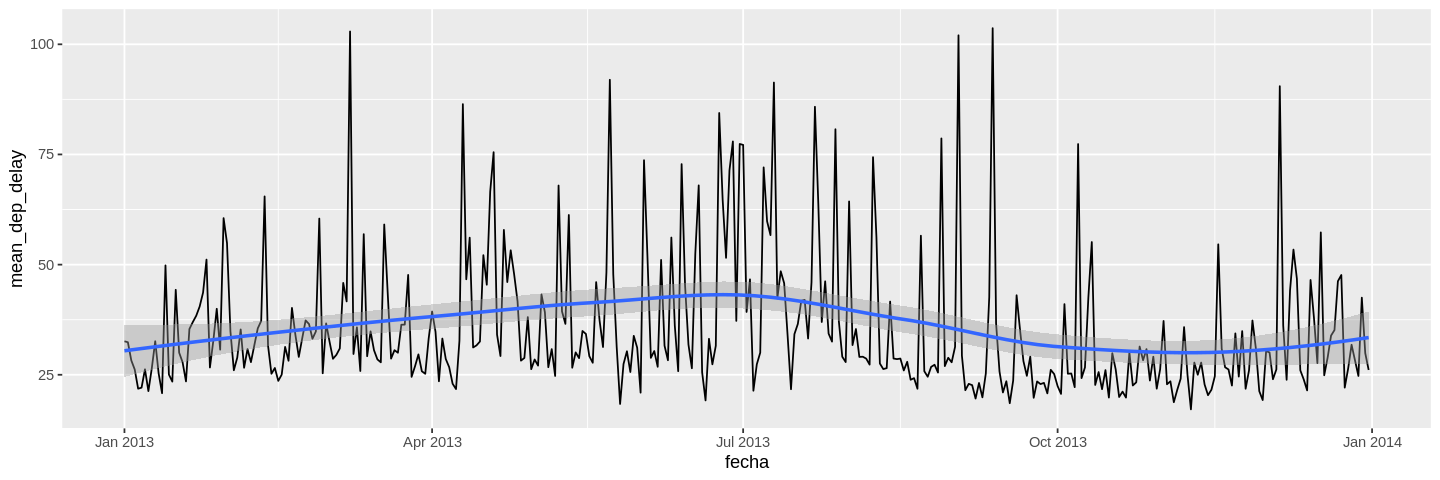

In [110]:
options(repr.plot.width=12, repr.plot.height=4)

#install.packages("ggplot2")
library(ggplot2)
vuelos_ret %>% 
    group_by(fecha) %>%
    summarise(mean_dep_delay = mean(dep_delay,na.rm = T)) %>%
    ggplot() +
    aes(x = fecha, y = mean_dep_delay) +
    geom_line() +
    geom_smooth()
    


In [ ]:
# P6

vuelos_ret_ampliado <-  vuelos_ret %>% 
                            left_join(clima, by=c("year","month","day","origin", "time_hour") )



In [ ]:
# P7 
vuelos_ret_ampliado <- vuelos_ret_ampliado %>% 
    mutate(arr_delay_alto = as.integer(ifelse(arr_delay >= 15, 1, 0)))

In [ ]:
# P8
# a) 

vuelos_ret_ampliado %>% 
    group_by(arr_delay_alto) %>%
    summarise(visib_prom = mean(visib,na.rm=T))

In [ ]:
# P8
# b)
vuelos_ret_ampliado %>% 
    group_by(arr_delay_alto) %>%
    summarise(precip_prom = mean(precip,na.rm=T))

In [ ]:
# P8
# c) 
vuelos_ret_ampliado %>% 
    group_by(arr_delay_alto) %>%
    summarise(wg_prom = mean(wind_gust,na.rm=T))

In [ ]:
# P8
# d) 
# - A menor visibilidad mayor retraseo.
# - A mayor precipitaciones, mayor retraso.

In [ ]:
# P9
# a)
#**a)** ¿Cuál es el aeropuerto de destino con mayor tasa de retrasos altos (arr_delay_alto) ? 

# El aeropuerto de destino CAE es el que posee la mayor tasa de retrasos altos.
vuelos_ret_ampliado %>% 
    group_by(dest) %>%
    summarise(tasa_ret_altos = mean(arr_delay_alto,na.rm=T)) %>%
    arrange(desc(tasa_ret_altos))

In [ ]:
# P9

#**b)** ¿Cuál es el mes con mayor tasa de retrasos altos?
# b)
vuelos_ret_ampliado %>% 
    group_by(year,month,day) %>%
    summarise(tasa_ret_altos = mean(dep_delay_alto,na.rm=T)) %>%
    arrange(desc(tasa_ret_altos)) %>%
    head()